# Data Preparation

Below are examples of the Titanic dataset, containing passenger records on board the titanic, and the OKCupid dataset, containing records authorized by OKCupid for use in Machine Learning research.

Your assignment is to combine the results of the Titanic and OKCupid datasets. You should replace each passenger aboard the titanic and their relevant data with a matching individual from the OKCupid dataset.

There should be no duplicates in the remaining dataset, with no NaNs, nulls, or missing information. More specifics at the bottom.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

# The first few records
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [0]:
# 891 passengers with 15 data entries per
print(titanic.shape)

(891, 15)


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


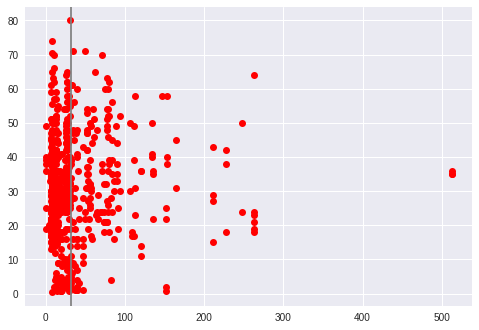

In [0]:
# describe produces interesting statistics about a pandas DataFrame or Series
print(titanic.describe(include=[np.number]))

import matplotlib.pyplot as plt
plt.plot(titanic['fare'],titanic['age'],'or')
plt.axvline(titanic['fare'].mean(),color="grey")

### OKCupid

The OKCupid dataset is 150MB and needs to be downloaded to your Colab session before you can load it. It loads using the same command as the titanic.

In [0]:
!wget https://www.dropbox.com/s/kurta6eazegc3su/JSE_OkCupid_profiles.csv?raw=1 -O /tmp/JSE_OkCupid_profiles.csv

--2018-04-27 20:06:26--  https://www.dropbox.com/s/kurta6eazegc3su/JSE_OkCupid_profiles.csv?raw=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/4o4K5pzu89QtyE2qio40A7w2J58MhD1YhveIeC39YdqTTg06P8w7pfUYbKHGnhN2/file [following]
--2018-04-27 20:06:26--  https://dl.dropboxusercontent.com/content_link/4o4K5pzu89QtyE2qio40A7w2J58MhD1YhveIeC39YdqTTg06P8w7pfUYbKHGnhN2/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.7.6, 2620:100:601a:6::a27d:706
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.7.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151614805 (145M) [text/csv]
Saving to: ‘/tmp/JSE_OkCupid_profiles.csv’

/tmp/JSE_OkCupid_pr 100%[===================>] 144.59M  37.6MB/s    in 3.8

In [0]:
okcupid = pd.read_csv('/tmp/JSE_OkCupid_profiles.csv')

# almost 60000 individuals with 31 columns each
print(okcupid.shape)

# There are many more columns in OKCupid than titanic
print(okcupid.columns)

# The set of body_types 
print(okcupid.body_type.unique())

(59946, 31)
Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']


In [0]:
# The number of unique entries for each column
for column in okcupid.columns:
  print(column, okcupid[column].unique().size)

age 54
body_type 13
diet 19
drinks 7
drugs 4
education 33
essay0 54351
essay1 51517
essay2 48636
essay3 43534
essay4 49261
essay5 48964
essay6 43604
essay7 45555
essay8 39325
essay9 45444
ethnicity 218
height 61
income 13
job 22
last_online 30123
location 199
offspring 16
orientation 3
pets 16
religion 46
sex 2
sign 49
smokes 6
speaks 7648
status 5


In [0]:
print(okcupid[1:10].isnull())

     age  body_type   diet  drinks  drugs  education  essay0  essay1  essay2  \
1  False      False  False   False  False      False   False   False   False   
2  False      False  False   False   True      False   False   False   False   
3  False      False  False   False   True      False   False   False   False   
4  False      False   True   False  False      False   False   False   False   
5  False      False  False   False   True      False   False   False   False   
6  False      False  False   False  False      False   False   False   False   
7  False      False  False   False  False      False    True   False   False   
8  False       True  False   False   True      False    True   False    True   
9  False      False  False   False  False      False   False   False   False   

   essay3   ...    location  offspring  orientation   pets  religion    sex  \
1    True   ...       False      False        False  False     False  False   
2   False   ...       False       True   

### Duplicates

There are no duplicates in OKCupid and 107 titanic duplicates.

In [0]:
print(okcupid.duplicated().sum())
print(titanic.duplicated().sum())

0
107


## Instructions

Titanic contains 891 records with 107 duplicates. The final table should contain 784 records. The titanic dataset is also full of  redudant columns: `survived : alive`, `sex : who : adult_male`, which can be identified if they are truly redundant and can be removed if so.

The OKCupid dataset has ~60k records. There are 31 columns that match many of the features (importantly age/sex) in the titanic set.

Update each row of the titanic dataset to contain OKCupid data that matches in demographic information. Select a few columns from the OKCUpid dataset to transfer to the titanic dataset as well to increase the personality of each entry. Do not move the extremely long written records in the OKCupid dataset as part of this process. Those records will be useful later for NLP and text mining.

_Document and justify your decisions!_

In [0]:
titanic.shape

(891, 15)

In [0]:
titanic = titanic.drop_duplicates()
titanic.shape

(784, 15)

In [0]:
# Axis=1 tells .drop that these are column labels
titanic1 = titanic.drop(['pclass', 'alive', 'adult_male', 'who', 'embarked'], axis=1)
titanic1.head()

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,NaN,Southampton,False
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,NaN,Southampton,True
3,1,female,35.0,1,0,53.1000,First,C,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,NaN,Southampton,True


In [0]:
titanic1.isnull()

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False
5,False,False,True,False,False,False,False,True,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,True,False,False
9,False,False,False,False,False,False,False,True,False,False


In [0]:
titanic1.isnull().any()

survived       False
sex            False
age             True
sibsp          False
parch          False
fare           False
class          False
deck            True
embark_town     True
alone          False
dtype: bool

In [0]:
print("Age Null Value Counts:")
titanic1.isnull().age.value_counts()

Age Null Value Counts:


False    678
True     106
Name: age, dtype: int64

In [0]:
print("Deck Null Value Counts:")
titanic1.isnull().deck.value_counts()

Deck Null Value Counts:


True     582
False    202
Name: deck, dtype: int64

In [0]:
print("Embark_Town Null Value Counts:")
titanic1.isnull().embark_town.value_counts()

Embark_Town Null Value Counts:


False    782
True       2
Name: embark_town, dtype: int64

In [0]:
# Fill age with median value
import math

median = titanic1.age.median()
print(median)

median = math.ceil(median)
print(median)

titanic1.age.fillna(median, inplace=True)

titanic1.head()

28.25
29


,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,NaN,Southampton,False
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,NaN,Southampton,True
3,1,female,35.0,1,0,53.1000,First,C,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,NaN,Southampton,True


In [0]:
titanic1.embark_town

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
5       Queenstown
6      Southampton
7      Southampton
8      Southampton
9        Cherbourg
10     Southampton
11     Southampton
12     Southampton
13     Southampton
14     Southampton
15     Southampton
16      Queenstown
17     Southampton
18     Southampton
19       Cherbourg
20     Southampton
21     Southampton
22      Queenstown
23     Southampton
24     Southampton
25     Southampton
26       Cherbourg
27     Southampton
28      Queenstown
29     Southampton
          ...     
854    Southampton
855    Southampton
856    Southampton
857    Southampton
858      Cherbourg
860    Southampton
861    Southampton
862    Southampton
864    Southampton
865    Southampton
866      Cherbourg
867    Southampton
868    Southampton
869    Southampton
871    Southampton
872    Southampton
873    Southampton
874      Cherbourg
875      Cherbourg
876    Southampton
879      Cherbourg
880    South

In [0]:
titanic1.embark_town.fillna(method='ffill', inplace=True)
titanic1.deck.fillna(method='ffill', inplace=True)

In [0]:
print("Embark_Town Null Value Counts:")
titanic1.isnull().embark_town.value_counts()

Embark_Town Null Value Counts:


False    784
Name: embark_town, dtype: int64

In [0]:
print("Deck Null Value Counts:")
titanic1.isnull().deck.value_counts()

Deck Null Value Counts:


False    783
True       1
Name: deck, dtype: int64

In [0]:
titanic1.deck

0      NaN
1        C
2        C
3        C
4        C
5        C
6        E
7        E
8        E
9        E
10       G
11       C
12       C
13       C
14       C
15       C
16       C
17       C
18       C
19       C
20       C
21       D
22       D
23       A
24       A
25       A
26       A
27       C
28       C
29       C
      ... 
854      D
855      D
856      D
857      E
858      E
860      E
861      E
862      D
864      D
865      D
866      D
867      A
868      A
869      A
871      D
872      B
873      B
874      B
875      B
876      B
879      C
880      C
881      C
882      C
883      C
885      C
887      B
888      B
889      C
890      C
Name: deck, Length: 784, dtype: category
Categories (7, object): [A, B, C, D, E, F, G]

In [0]:
titanic1.isnull().any()

survived       False
sex            False
age            False
sibsp          False
parch          False
fare           False
class          False
deck            True
embark_town    False
alone          False
dtype: bool

# **Merge Titanic and OKC Data**

**Remove Underage Passengers ![alt text](https://)** \\
The easiest way to figure out how to merge underage titanic passengers with OKCupid adults is to... just not do it. Drop those kids!

In [0]:
titanic_adults = titanic1[titanic1['age'] >= 18]
titanic_adults.shape

(674, 10)

**Remove Extra OKC Columns** \\
There's a lot of OKC data that would make this merge uber complicated. The only aspects of the two datasets that really relate are age, gender, and income, so we'll keep those as well as a few others that might be interesting to look at. Drop the rest like it's hot. 

In [0]:
okcupid_df = okcupid.drop(['essay0', 'essay1', 'essay2', 'essay3', 'essay4',
                          'essay5', 'essay6', 'essay7', 'essay8', 'essay9',
                          'last_online', 'location', 'speaks', 'status', 
                          'pets', 'religion'], axis=1)

okcupid_df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,sex,sign,smokes
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,m,gemini,sometimes
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,m,cancer,no
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,m,pisces but it doesn&rsquo;t matter,no
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,m,pisces,no
4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,m,aquarius,no


**Closer Look at OCK income and Titanic fares.** \\
Matching passengers with users based on age and gender shouldn't be too crazy since gender is binary, (Thomson would say "binomial") and ages are given in integer values. Matching on income is more complex since fare is only a proxy for income and OKC incomes have a lot of missing values coded as: (-1)

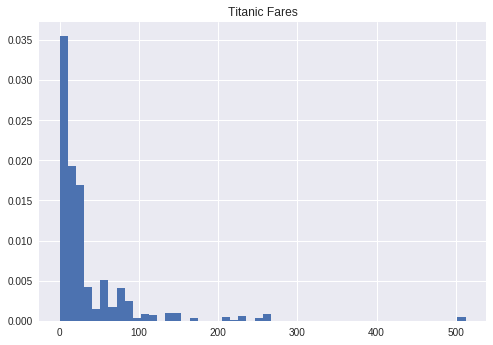

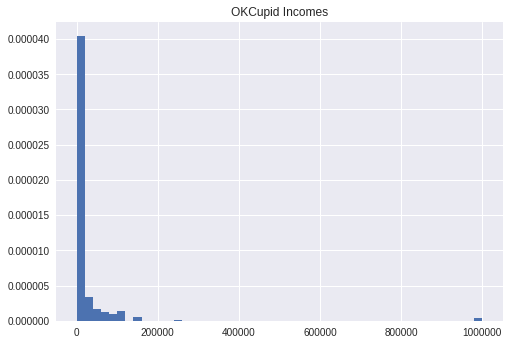

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

In [0]:
import matplotlib.pyplot as plt

plt.hist(titanic_adults['fare'], normed=True, bins=50, label="titanic fares")
plt.title('Titanic Fares')
plt.show();

plt.figure()

plt.hist(okcupid_df['income'], normed=True, bins=50)
plt.title('OKCupid Incomes')
plt.show();

okcupid_df['income'].value_counts()

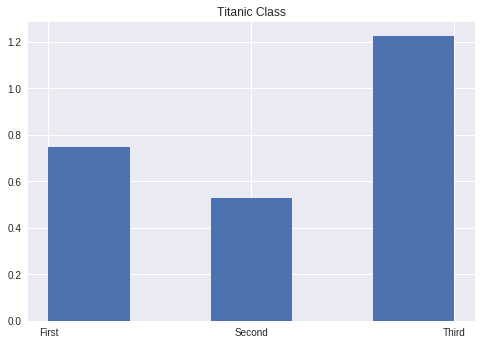

In [0]:
plt.hist(titanic_adults['class'], normed=True, bins=5, label="titanic fares")
plt.title('Titanic Class')
plt.show();

**Using fare/income to generate an OCK 'class' based on income quantiles** \\
separate fares into three different "Quantiles". A Quantile is a division of a distribution based on some criteria. https://en.wikipedia.org/wiki/Quantile

In [0]:
passengers = titanic_adults.shape[0]

# First calculate the mean fare for First and Third Class passengers
second_class_fare = titanic_adults[titanic_adults['class']=='First']['fare'].mean()
third_class_fare = titanic_adults[titanic_adults['class']=='Third']['fare'].mean()

# And then divided the distribution into 3 quantiles using those values as the cutoffs. 
upper_quantile = titanic_adults[titanic_adults['fare']<second_class_fare].shape[0] / passengers
lower_quantile = titanic_adults[titanic_adults['fare']<third_class_fare].shape[0] / passengers

print(upper_quantile)
print(lower_quantile)

0.9065281899109793
0.4035608308605341


If we want to divide up the OKCupid peeps into similar Quantiles, we first need to handle all of the -1 missing values. Missing values aren't always coded as NaNs. In government datasets you'll sometimes see something like 9999999 as code for a missing values, so if you don't check for outliers you're results are going to be very wrong. You'll catch these things if you graph your data.

In [0]:
# The -1 values will mess up any numerical calculations, so lets replace them with NaNs 
okcupid_df['income'] = okcupid_df['income'].replace(-1, np.nan)

Now we can calculate the OKCupid income level that corresponds to the Titanic Class/Fare Quantiles. This equivalency is vital to the matching of the two datasets.

In [0]:
lower_value = okcupid_df['income'].quantile(lower_quantile)
upper_value = okcupid_df['income'].quantile(upper_quantile)

print([lower_value, upper_value])

[40000.0, 150000.0]


In [0]:
# Now that we have NaN values instead of -1 we can impute those the way that we're familiar with.
okcupid_df['income'] = okcupid_df['income'].fillna(okcupid_df['income'].median())

# Now we can create an OKCupid "class" column as well based on which quantile their incomes fall into.
okcupid_df['class'] = pd.Series(['Third' if x<=lower_value else 'First' if x>=upper_value else 'Second' for x in okcupid_df['income']])

okcupid_df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,sex,sign,smokes,class
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,50000.0,transportation,"doesn&rsquo;t have kids, but might want them",straight,m,gemini,sometimes,Second
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,m,cancer,no,Second
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,50000.0,NaN,NaN,straight,m,pisces but it doesn&rsquo;t matter,no,Second
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000.0,student,doesn&rsquo;t want kids,straight,m,pisces,no,Third
4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,50000.0,artistic / musical / writer,NaN,straight,m,aquarius,no,Second


Now lets clean the rest of OKCupid. 

In [0]:
def fillna_mixed_columns(dataframe):
    """Fills missing dataframe values with the median value for numeric columns, ignoring non-numeric columns
    https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn
    
    Args:
        dataframe (pandas.core.frame.DataFrame): dataframe with observations as rows and features as columns
        
    Returns:
        dataframe with missing values in numeric columns filled with the columns' mean values
        
    """
    fill = pd.Series([dataframe[c].value_counts().index[0] 
                      if dataframe[c].dtype != np.dtype(np.int64) or dataframe[c].dtype != np.dtype(np.float64) 
                      else dataframe[c].mean() for c in dataframe], 
                     index=dataframe.columns)
    
    return dataframe.fillna(fill)

In [0]:
# fill in the remaining NaN values with most common value, as with the Titanic dataset

cupid_filled = fillna_mixed_columns(okcupid_df)

cupid_filled.isnull().any()

age            False
body_type      False
diet           False
drinks         False
drugs          False
education      False
ethnicity      False
height         False
income         False
job            False
offspring      False
orientation    False
sex            False
sign           False
smokes         False
class          False
dtype: bool

Now we have two "clean" datasets with "age", "sex", and "class" features in both. We're ready to try and start matching information.

In [0]:
def get_cupid_match(df, age, sex, income_class):
  
  # We can filter the cupid dataframe based on our three criteria to create a pool of all acceptable candidates
  pool = df[(df['age']==age) & (df['sex']==sex) & (df['class']==income_class)]
    
  # Then, if the pool isn't empty, we'll just sample one and use that as our match
  if pool.shape[0] > 0:
      return pool.sample(1)
  # But if there isn't a matching user, then we'll have grab a random person from the cupid dataframe 
  # and force them to have the right criteria.
  else:
      sample = df.sample(1)
      sample['age'] = age
      sample['sex'] = sex
      sample['class'] = income_class
      return sample
    
    
# We'll test it out with one user.    
get_cupid_match(cupid_filled, 35, 'm', 'First')

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,sex,sign,smokes,class
33932,35,fit,mostly anything,socially,never,graduated from law school,white,69.0,150000.0,law / legal services,doesn&rsquo;t have kids,straight,m,capricorn and it&rsquo;s fun to think about,no,First


Ok, so we know that we can get a matching user. All that's left is to loop through titanic looking at the 3 features that we need and grab the corresponding cupid match.

In [0]:
# New DF to hold cupid matches.
cupid_matches = pd.DataFrame() 

for person in range(titanic_adults.shape[0]):
  
  # Get info from titanic person
  titanic_age = titanic_adults.iloc[person]['age']
  titanic_sex = titanic_adults.iloc[person]['sex']
  titanic_class = titanic_adults.iloc[person]['class']

  # Grab the OKC match and add them to the cupid_matches dataframe
  matching_person = get_cupid_match(cupid_filled, titanic_age, titanic_sex, titanic_class)
  cupid_matches = cupid_matches.append(matching_person)

In [0]:
cupid_matches.shape

(674, 16)

In [0]:
cupid_matches.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,sex,sign,smokes,class
49535,22.0,average,mostly anything,socially,never,graduated from college/university,"black, white",72.0,50000.0,other,"doesn&rsquo;t have kids, but wants them",straight,male,pisces but it doesn&rsquo;t matter,no,Third
44754,38.0,a little extra,mostly anything,socially,never,working on space camp,white,74.0,30000.0,other,doesn&rsquo;t have kids,straight,female,libra and it&rsquo;s fun to think about,no,First
21811,26.0,curvy,mostly anything,socially,never,graduated from masters program,white,64.0,50000.0,other,doesn&rsquo;t have kids,straight,female,gemini,no,Third
19651,35.0,athletic,mostly anything,socially,sometimes,working on two-year college,white,67.0,30000.0,executive / management,doesn&rsquo;t have kids,straight,female,sagittarius but it doesn&rsquo;t matter,yes,First
10767,35.0,fit,mostly anything,socially,sometimes,graduated from law school,white,71.0,50000.0,law / legal services,has kids,straight,male,taurus and it&rsquo;s fun to think about,no,Third


In [0]:
titanic_adults.head()

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,NaN,Southampton,False
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,C,Southampton,True
3,1,female,35.0,1,0,53.1000,First,C,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,C,Southampton,True


**Re-index the dataframes** \\
Reindexing the dataframes will give us a unique and matching value for each observation in both datasets. This will make merging them oh so easy. Before reindexing you might want to double check your columns to make sure that the two datasets truly are in the same order so that you can be confident that the reindex will assigning the new indices correctly. I spot checked the data by printing a few things out above, but you could be more thorough with your own analysis. Let me know if I've made a mistake.

In [0]:
# Lets reindex both dataframes so that we can use the index as the unique identifier to merge them on.
cupid_matches = cupid_matches.reset_index(drop=True)
titanic_adults = titanic_adults.reset_index(drop=True)

# Also, accessing the index in a merge is annoying, so lets create a new column 
# that we can access more directly to represent the row index.

titanic_adults['merge_index'] = titanic_adults.index
cupid_matches['merge_index'] = cupid_matches.index

In [0]:
final_df = pd.merge(titanic_adults, cupid_matches, on='merge_index')

final_df.head()

,survived,sex_x,age_x,sibsp,parch,fare,class_x,deck,embark_town,alone,...,ethnicity,height,income,job,offspring,orientation,sex_y,sign,smokes,class_y
0,0,male,22.0,1,0,7.2500,Third,NaN,Southampton,False,...,"black, white",72.0,50000.0,other,"doesn&rsquo;t have kids, but wants them",straight,male,pisces but it doesn&rsquo;t matter,no,Third
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,False,...,white,74.0,30000.0,other,doesn&rsquo;t have kids,straight,female,libra and it&rsquo;s fun to think about,no,First
2,1,female,26.0,0,0,7.9250,Third,C,Southampton,True,...,white,64.0,50000.0,other,doesn&rsquo;t have kids,straight,female,gemini,no,Third
3,1,female,35.0,1,0,53.1000,First,C,Southampton,False,...,white,67.0,30000.0,executive / management,doesn&rsquo;t have kids,straight,female,sagittarius but it doesn&rsquo;t matter,yes,First
4,0,male,35.0,0,0,8.0500,Third,C,Southampton,True,...,white,71.0,50000.0,law / legal services,has kids,straight,male,taurus and it&rsquo;s fun to think about,no,Third


In [0]:
final_df.shape

(674, 27)

In [0]:
final_df.duplicated().value_counts()

False    674
dtype: int64

### Benchmark

The titanic dataset is very popular for beginning Data Science training.

Your final dataset should perfectly match these two obvious and famous benchmarks of the titanic data, with other new, interesting analysis available from your combinations:

In [0]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.740614
male,0.215886


In [0]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.967742,0.917808,0.472441
male,0.371901,0.184783,0.158273


### Suggested search terms

python pandas replace columns

python pandas concatenate columns

python pandas concatenate rows

python pandas remove duplicates

python pandas merge and join records


# Stretch goal

Analyze the data in your new titanic dataset using the visualization tutorials found here:


[Seaborn plots](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)